# SI370 FA 2017
## Class 6.1: Resampling & Project Preliminaries

## October 9, 2017

## <font color="red">REMEMBER TO SUBMIT your Jupyter Notebook (to Lab 6.1) via Canvas before you leave class today!

## Fill in your name here: Alexander J Goldstein

In [189]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_context("notebook")  # make figures fit
from pylab import rcParams
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 19})
sns.set(font_scale=1.5)
plt.rcParams['figure.figsize'] = 7,4
from statsmodels.graphics.mosaicplot import mosaic
exec(open('useful.py').read())
from IPython.display import Image
from IPython.core.display import HTML 

# make the Pandas tables a little more readable

from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

def vline(ax1,loc,text=""):
    ax1.vlines(loc,ax1.get_ylim()[0],ax1.get_ylim()[1])
    if (text != ""):
         ax1.text(loc,ax1.get_ylim()[1]/2,text,ha='left',fontsize=20)

# Today
* Announcements, etc.
* The Midterm
 * Start preparing your 8.5x11, double-sided cheat sheet
 * Sample cheat-sheets and midterm questions in Files -> Midterm Resources
* Homework Review
* Resampling
    * With and Without Replacement
    * Bootstrap (using sampling with replacement)
    * FYI: Jackknife
* Project Preliminaries



# Homework Review (Kai)

# Resampling

## Why do we resample?

# Selecting things at random in Python

In [190]:
# some examples from
# https://people.duke.edu/~ccc14/sta-663/ResamplingAndMonteCarloSimulations.html

## NOTE TO SELF: np.random.choice is the key to all things resampling in Python!

In [191]:
# Sampling is done with replacement by default
# means give me 12 numbers beween 0 and 4
#x = [0,1,2,3]
np.random.choice(4,12)
# alternative np.random.choice(x,12)

array([1, 2, 0, 3, 3, 3, 1, 1, 1, 2, 2, 1])

In [192]:
# Probability weights can be given
# higher probability of 3's and 0's 
# (needs to sum to 1)
np.random.choice(4,12,p=[.4,.1,.1,.4])

array([0, 3, 3, 0, 3, 3, 1, 3, 3, 0, 0, 3])

In [193]:
# random with replacement from list
x = [4,6,9,10,2,3,2,8]
l = len(x)
# pull l numbers at random (with replacment)
# from x
np.random.choice(x,l)

array([6, 3, 9, 6, 2, 2, 2, 2])

In [194]:
# can we do this many times?
# Make me 5 random "experiments"
# pulling from x
np.random.choice(x,(5,l))

array([[ 8,  2,  9,  6,  3,  8,  6,  9],
       [ 2,  8, 10,  3,  9,  2,  3,  8],
       [ 2, 10,  3,  9,  3,  4,  2,  4],
       [ 2,  2,  8,  3,  2, 10,  8,  9],
       [ 4,  3,  8,  2,  6,  6,  9,  8]])

In [195]:
# order is important, especially when you're doing something like calculating the mean
# compare the above cell to
np.random.choice(x,(l,5))

# in this version we have 

array([[ 3,  9,  3,  8,  9],
       [ 2,  2,  8,  3, 10],
       [ 4,  9,  4,  9,  2],
       [ 8,  2,  8,  8,  9],
       [ 6,  2,  3,  6,  2],
       [ 8, 10,  2,  4,  6],
       [ 2,  9,  8,  8,  4],
       [ 3,  6, 10,  3,  9]])

If you're confused about the order of parameters to np.random.choice, the short version is:

`np.random.choice(possible_choices, (number_rows, number_columns))`

This will fill a grid that is number of rows x number of columns with numbers selected at random from the possible choices.  

In [196]:
# If we turn replacement off
# can we pull 12 numbers from 4?
try:
    np.random.choice(4, 12, replace=False)
except ValueError as e:
    print(e)

Cannot take a larger sample than population when 'replace=False'


In [197]:
# Shuffle some numbers I
x = np.arange(6) # numbers 0-5
print("before shuffle=",x)
np.random.shuffle(x)  # in place
print("after shuffle=",x)

before shuffle= [0 1 2 3 4 5]
after shuffle= [1 3 0 4 2 5]


In [198]:
# shuffle numbers II
x = np.arange(6)
y = np.random.permutation(x)
print("before shuffle x=",x)
print("after shuffle x=",x)
print("after shuffle y=",y)

before shuffle x= [0 1 2 3 4 5]
after shuffle x= [0 1 2 3 4 5]
after shuffle y= [1 0 3 2 5 4]


In [199]:
# shuffle the numbers between 0 and 9
np.random.permutation(10)

array([8, 6, 0, 1, 3, 5, 2, 9, 4, 7])

In [200]:
from io import StringIO

testdata = """x,y
8.7179,13.4615
15.8974,20
31.2821,33.0769
46.1538,36.5385
50.7692,45.7692
60.2564,56.1538
67.6923,52.6923
75.641,66.1538
82.0513,75.7692
87.1795,83.4615
67.9487,65.3846
38.4615,33.0769
24.1026,26.5385
37.1795,75.3846"""

testout1 = pd.read_csv(StringIO(testdata))

In [201]:
testout1.head()

x        y
0   8.7179  13.4615
1  15.8974  20.0000
2  31.2821  33.0769
3  46.1538  36.5385
4  50.7692  45.7692

### NOTE TO SELF: .sample() is another cool function

In [202]:
# randomly sample from a pandas table
testout1.sample(8)  # give me 8 rows at random

x        y
12  24.1026  26.5385
7   75.6410  66.1538
1   15.8974  20.0000
9   87.1795  83.4615
2   31.2821  33.0769
13  37.1795  75.3846
8   82.0513  75.7692
0    8.7179  13.4615

In [203]:
# randomly sample with replacement
testout1.sample(8,replace=True)

x        y
4   50.7692  45.7692
12  24.1026  26.5385
11  38.4615  33.0769
4   50.7692  45.7692
13  37.1795  75.3846
0    8.7179  13.4615
12  24.1026  26.5385
11  38.4615  33.0769

In [204]:
# randomly sample some fraction (50%)
testout1.sample(frac=.5)

x        y
11  38.4615  33.0769
10  67.9487  65.3846
4   50.7692  45.7692
7   75.6410  66.1538
9   87.1795  83.4615
0    8.7179  13.4615
2   31.2821  33.0769

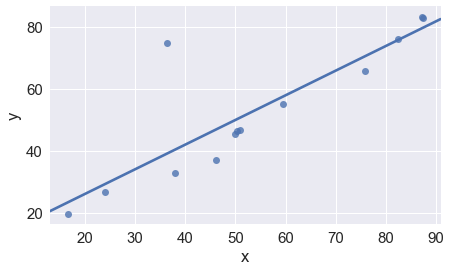

In [205]:
# plot our random sample (jitter so we can see the points)
df_sample = testout1.sample(13,replace=True)
sns.regplot(df_sample.x,df_sample.y,x_jitter=True,
           y_jitter=True,ci=False)

### NOTE TO SELF (QUESTION): If you have the computational power for it, why not use a resampling method like bootstrap or jackknife everytime before calculating inferential statistics about the (unknown) population from your sample??

# The Bootstrap

Calculate confidence intervals (for some metric) when we don't know our population

All we have is a sample...

In [206]:
# our magical hidden dataset
hidden = np.concatenate([np.random.exponential(size=200), np.random.normal(size=100)])

mean =  0.690897919047


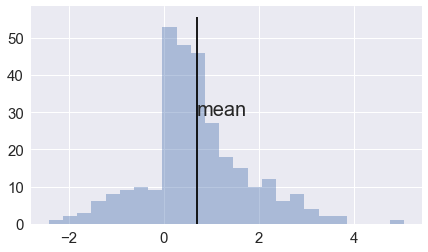

In [207]:
# For example, what is the 95% confidence interval for
# the mean of this data set if you didn't know how it was generated?
ax = sns.distplot(hidden,25,kde=False) # 25 --> 25 bins for histogram
vline(ax,loc=np.mean(hidden),text="mean")
print("mean = ",np.mean(hidden))

In [208]:
reps = 10000 # number of loops

# pick from x, the same number of 
# elements, do it 10k times
xb = np.random.choice(hidden,(reps,len(hidden)))
mb = xb.mean(axis=1) # will return 10k numbers (the means)

Remember above we said that np.random.choice looks like:

`np.random.choice(possible_values, (rows, columns)`

When we say make 10k experiments, we can either create 10k experiments as rows or as columns:

`np.random.choice(possible_values, (10000, columns)`

or

`np.random.choice(possible_values, (rows, 10000)`

We have to remember which we used when we calculate things like the "means" across all 10k.

In the case above, each of my "experiments is in a row"  so 10k rows, 300 columns --> we need to calculate the mean for each row... hence axis = 1

If we rotated (300 rows, 10k columns), we would have calculated the mean by column, so axis = 0

`xb = np.random.choice(hidden,(len(hidden),reps))
mb = xb.mean(axis=0)`

[ 0.57272734  0.81331813]


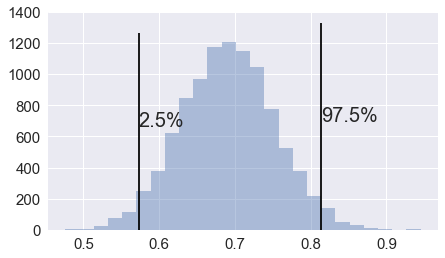

In [209]:
# get/plot percentiles
mb.sort() # sort all the means
ptile = np.percentile(mb,[2.5,97.5])
print(ptile)  # two cutoffs, one at 2.5% one at 97.5%
ax = sns.distplot(mb,25,kde=False)
vline(ax,ptile[0],"2.5%")  # label the two cutoffs
vline(ax,ptile[1],"97.5%")

mean= 0.690906808342
stdev= 0.0612446510194


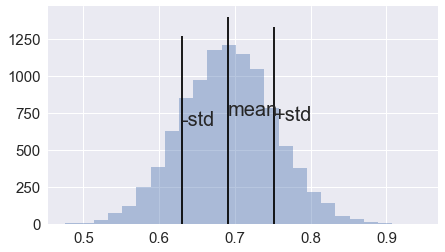

In [210]:
# find the mean, +/- 1 std
ax = sns.distplot(mb,25,kde=False)  # 25 bins
print("mean=",np.mean(mb))
print("stdev=",np.std(mb))
vline(ax,np.mean(mb)-np.std(mb),"-std")
vline(ax,np.mean(mb)+np.std(mb),"+std")
vline(ax,np.mean(mb),"mean")

# Parameter CI using the bootstrap

![](yertle.png 'yertle')

In [211]:
from io import StringIO
TEST ="""wind,tower
8.102156826224622,21.107692307692307
8.39903892717452,19.16923076923077
8.892471596200409,18.107692307692307
8.797079530638852,16.123076923076923
8.99264667535854,14.96923076923077
9.095392065561557,17.138461538461538
9.20432855280313,17.092307692307692
9.306023468057365,17.092307692307692
9.394151611100764,19.076923076923077
9.602346805736635,14
9.900167628981189,14
10.009640528962562,15.061538461538461
10.000476811324269,11.13846153846154
10.494892903706464,12.107692307692307
10.596520767368224,11.969230769230771
10.604343453157012,13.123076923076923
11.191156639970199,9.892307692307693
11.807673682249952,8
12.599932948407524,9.015384615384615"""

turtles = pd.read_csv(StringIO(TEST))
#turtles.head()
# example from: https://speakerdeck.com/jakevdp/statistics-for-hackers

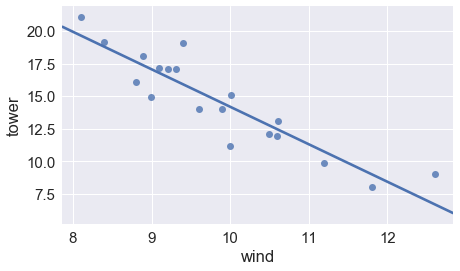

In [212]:
# some turtles
sns.regplot(turtles.wind,turtles.tower,ci=0);

In [213]:
slope, intercept, r, p, serr = stats.linregress(turtles.wind,
                                                turtles.tower)
print("slope=",slope)
print("intercept=",intercept)
print("r value=",r)
print("p value=",p)
print("standard error",serr)

slope= -2.87766815259
intercept= 42.9621607108
r value= -0.91106074607
p value= 5.94756999703e-08
standard error 0.315829651964


In [214]:
# find slopes and intercepts

slopes = []  # collect slopes
intercepts = []
for i in np.arange(1000):
    newtower = turtles.sample(len(turtles),replace=True)
    slope, intercept, r, p, serr = stats.linregress(newtower.wind,
                                                    newtower.tower)
    slopes = slopes + [slope]
    intercepts = intercepts + [intercept]
    print(slope)


-2.67828202344
-3.03259160738
-2.40059361235
-3.00219539903
-3.08023353431
-2.78356042372
-2.84207239493
-2.73415204375
-2.57444006197
-3.09365798065
-2.83181379862
-3.20349131779
-2.72485176693
-2.61414648239
-3.6790427469
-2.83997145751
-2.5641633897
-3.63848171411
-2.72283275073
-2.67401695617
-3.23301066607
-2.84787967372
-3.28097352557
-2.83740051435
-3.17928766038
-2.75801897421
-2.69903857266
-3.90590358091
-2.3107914362
-3.30565638634
-2.73933835545
-3.40703826735
-2.98077234747
-3.46662270253
-2.90498531468
-2.60840691626
-3.14297160733
-3.35768927169
-3.08594723493
-2.79010924633
-2.66130859243
-3.54173910857
-2.70028844621
-2.85900181454
-3.6645969761
-2.39888511501
-2.44249966704
-3.40532820327
-2.30909223144
-3.04345720746
-2.6541924385
-3.43972854991
-3.00464759378
-3.1798574488
-3.66576311403
-2.55453225523
-2.79685992693
-2.87307818803
-2.48988949592
-2.98364871024
-3.34913882705
-2.81410881699
-2.55132341112
-3.13595079636
-2.58109399646
-2.39561892721
-2.9758742639
-3

-3.1871780812
-2.61352277199
-2.35861141765
-2.60619630531
-3.05060969923
-2.91581927912
-3.2978779595
-2.99924773067
-2.77132063994
-2.63918687538
-3.05449788397
-3.1531190969
-3.03213666023
-2.51499184126
-2.90110150608
-2.86980659188
-2.87089589038
-3.49646829622
-2.81236538844
-2.45934778625
-2.76679082302
-2.40346315878
-2.8580768044
-2.62385954241
-3.39614802981
-2.76419306286
-3.05256826875
-2.90250346713
-2.56031226847
-2.99677299953
-2.9473881928
-3.35946071062
-2.80313914288
-3.3703099071
-2.30702909335
-2.61334792946
-3.25211297522
-3.01170499886
-3.05088838253
-3.85674680079
-2.72822438908
-2.61921180384
-2.63306240472
-2.32571855427
-3.54311947989
-3.1429025528
-3.02928711573
-3.23467409641
-2.83508947934
-2.9768649898
-3.44772108442
-2.53697578712
-3.25961682762
-3.06559116546
-3.45128856618
-2.51928913792
-3.69228241424
-3.39545177338
-2.98890041621
-3.34376771073
-2.94480632715
-2.77070739483
-2.65458886519
-3.93712662649
-2.92844680936
-2.73108477753
-3.02590076259
-3.

In [215]:
# put it all in a pandas data frame
samples = pd.DataFrame()
samples['slopes'] = slopes
samples['intecepts'] = intercepts
samples.head()

slopes  intecepts
0 -2.678282  41.293892
1 -3.032592  44.308524
2 -2.400594  37.803684
3 -3.002195  44.348601
4 -3.080234  45.498017

In [216]:
# what are the mean slopes/intercepts?
print("mean slope=",np.mean(slopes))
print("mean intercept=",np.mean(intercepts))


mean slope= -2.94731959672
mean intercept= 43.6012463824


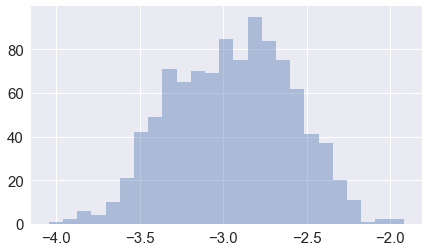

In [217]:
# plot slope distribution
sns.distplot(slopes,25,kde=False)

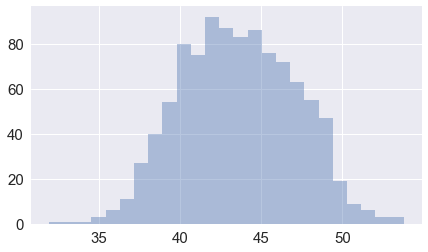

In [218]:
# plot intercept distribution
sns.distplot(intercepts,25,kde=False)

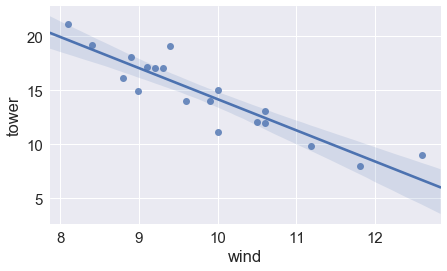

In [219]:
# regression with 95% CI drawn
sns.regplot(turtles.wind,turtles.tower);

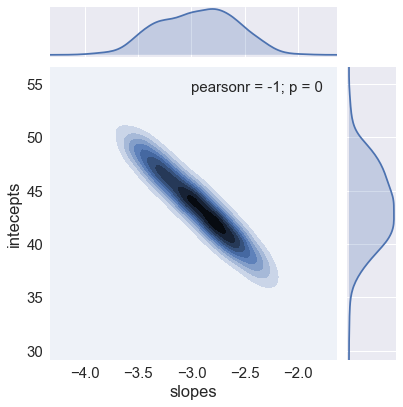

In [220]:
# parameter space (CI)
#samples.head()
sns.jointplot("slopes","intecepts",data=samples,kind="kde")

## Some caveats

Bootstrap is pretty awesome
* robust across multiple assumptions

Works across many statistics but not all
* e.g., max val
* $>$ 20 points is good rule

Still need to validate independence assumption

# BEGIN Q1
## <font color="red">Q1: With the 370survey.csv data set, use the bootstrap method to estimate the slope for a regression of worry and enthusiasm using different sample sizes (100, 1000, 5000, 10000)


First, define a function to help us draw vertical lines on our charts.

In [221]:
def vline(ax1,loc,text=""):
    ax1.vlines(loc,ax1.get_ylim()[0],ax1.get_ylim()[1])
    if (text != ""):
         ax1.text(loc,ax1.get_ylim()[1]/2,text,ha='left',fontsize=20)

Read the data and redefine column names to make life easier

In [222]:
survey = pd.read_csv('370survey.csv')
survey.columns=['f','l','g','h','enthusiasm','worry','q1','q2','q3','q4','q5','total']

Calculate a regression on the survey data

In [223]:
slope, intercept, r, p, serr = stats.linregress(survey.worry,
                                                survey.enthusiasm)
print("slope=",slope)
print("intercept=",intercept)
print("r value=",r)
print("p value=",p)
print("standard error",serr)

slope= -0.13597972973
intercept= 4.33277027027
r value= -0.235126961655
p value= 0.129073519899
standard error 0.0877870167302


Take a look at the visual representation

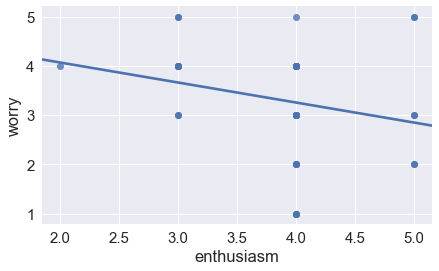

In [224]:
sns.regplot(x=survey.enthusiasm,y=survey.worry,ci=0)

In [225]:
# set the number of samples; change this value according to the instructions
nsamples = 100


In [226]:

# find slopes and intercepts

slopes = []  # collect slopes
intercepts = []
for i in np.arange(nsamples):
    newsurvey = survey.sample(len(survey),replace=True)
    slope, intercept, r, p, serr = stats.linregress(newsurvey.worry,
                                                    newsurvey.enthusiasm)
    slopes = slopes + [slope]
    intercepts = intercepts + [intercept]


mean slope= -0.148345664278
mean intercept= 4.35922992947
     slopes  intercepts
0 -0.184783    4.586957
1 -0.058238    4.178544
2 -0.142952    4.252813
3 -0.191931    4.504148
4 -0.162393    4.273504
[-0.32264962 -0.00389344]


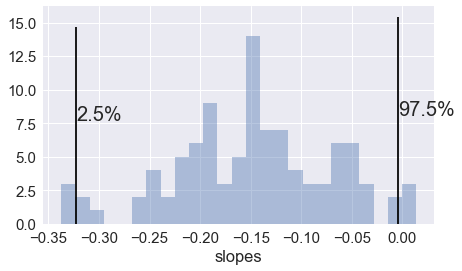

In [227]:
# what are the mean slopes/intercepts?
print("mean slope=",np.mean(slopes))
print("mean intercept=",np.mean(intercepts))

# put it all in a pandas data frame
samples = pd.DataFrame()
samples['slopes'] = slopes
samples['intercepts'] = intercepts
print(samples.head())
# get/plot percentiles
mb = samples['slopes'].dropna().sort_values()
#mb=ss.sort() # sort all the means
ptile = np.percentile(mb,[2.5,97.5])
print(ptile)  # two cutoffs, one at 2.5% one at 97.5%
ax = sns.distplot(mb,25,kde=False)
vline(ax,ptile[0],"2.5%")  # label the two cutoffs
vline(ax,ptile[1],"97.5%")

## <font color="red">Q1a: Record the 95% confidence interval for the slopes at 100, 1000, and 5000 samples.  Describe the histogram of the means for each samples size

Replace this with your observations

## <font color="red">Q1b: How does the confidence interval change with increasing sample size?

Replace this with your answer

# <font color="red">END Q1</font>

# FYI: Jackknife

The jackknife works by leaving one (or more depending on the version) data points out and calculating the statistic of interest.  So if we had 10 data points and were working on the variance, we would:
* remove only the first point and calculate the variance for all the rest
* remove only the second point and calculate the variance for all the rest
* and so on...

The *mean* of these variances is the jackknife estimate.  Call this $\theta_{jack}$

The jackknife turns out to be very helpful for biased estimators.  In many cases, when we have data it is simply a sample of a real population.  For reasons too long to get into right now (you can go read: https://en.wikipedia.org/wiki/Variance#Sample_variance if you're interested), there is a difference between the variance we get if we have the entire population and the variance we get if we just have a sample (most real world situations).  While the variance we tend to compute is calculated as $\frac{1}{n}\sum{(y_i-\mu)^2}$, it turns out that a better estimate (given the fact that we have a sample) is $\frac{1}{n-1}\sum{(y_i-\mu)^2}$ (the mean happens to already be unbiased so we don't have to bother, but many other estimators are).

For variance, we happen to know the correction but in many other cases we may not. This is where the jackknife comes in handy.  It will "debias" or estimate.  So if we have our biased estimate, $\theta$, we could debias this by doing

$$ n * \theta - (n-1) * \theta_{jack}$$

In the case of variance:

$$ {unbiased~variance} = n * {biased~variance} - (n-1) * {jackknife~variance}$$

Before we get to this, let's see how the "leave one out" thing is implemented:

In [228]:
# leave one out Jackknife example
x = np.array([33,26,29,32,31])  # our data
print(x)

inds = np.arange(len(x))    # the indices (basically 0...5) corresponding to the data points in x
for i in inds:              # for i = 0 to 5
    keep = inds[inds != i]  # only consider the index that *isn't* = i
    y = x[keep]             # find the values corresponding to this "leave one out" index list
    print("leave out index ",i," keep ",keep,"--",y," (we ignored ",x[i],")")



[33 26 29 32 31]
leave out index  0  keep  [1 2 3 4] -- [26 29 32 31]  (we ignored  33 )
leave out index  1  keep  [0 2 3 4] -- [33 29 32 31]  (we ignored  26 )
leave out index  2  keep  [0 1 3 4] -- [33 26 32 31]  (we ignored  29 )
leave out index  3  keep  [0 1 2 4] -- [33 26 29 31]  (we ignored  32 )
leave out index  4  keep  [0 1 2 3] -- [33 26 29 32]  (we ignored  31 )


In [229]:
# same as above, but calculate the variance statistic
# find variance for each sample
for i in inds:
    keep = inds[inds != i]
    y = x[keep]
    print("leave out ",i,"--",y,"var=",np.var(y))

leave out  0 -- [26 29 32 31] var= 5.25
leave out  1 -- [33 29 32 31] var= 2.1875
leave out  2 -- [33 26 32 31] var= 7.25
leave out  3 -- [33 26 29 31] var= 6.6875
leave out  4 -- [33 26 29 32] var= 7.5


In [230]:
# calculate mean of vars
# so (124.6875 + 246.1875...+168.25)/5
sum = 0
for i in inds:
    keep = inds[inds != i]
    y = x[keep]
    sum += np.var(y)
jackvar = sum/len(x)
print("mean of vars=",jackvar)

mean of vars= 5.775


Let's get back to correcting the variance.  Remember that for variance we happen to know the unbiased estimate is $\frac{1}{n-1}\sum{(y_i-\mu)^2}$.

In [231]:
n = len(x)
mu = np.mean(x)
np.sum((x - mu)**2)/(n-1)

7.6999999999999993

Right around 7.7.  So what does our biased estimate say?

In [232]:
np.var(x)

6.1599999999999993

6.15 isn't exacly close to 7.7.  So let's see if we can use the jackknife correction:

$$ n * {biased} - (n-1) * {jack}$$


In [233]:
print("unbiased=",n * np.var(x) - (n-1)*jackvar)


unbiased= 7.7


That's much better. 

Practically, why do we care?   Let's say I give you 10 points.  I tell you these from a normal distribution and you should estimate the parameters of the distribution (mean and std).  If you calculate the mean and variance/std directly from the 10 points, and use those as the parameters of the model, chances are you will have been right about the mean and wrong about the variance/stddev.  Simply put, the jackknife lets you get a more reliable (unbiased) estimate.

# Summary

* Sampling/resampling pretty magical
* Can test assumptions
* Can build robust statistics
* Boostrap + Jackknife are common (easy to implement) tools
* Robust across many different distributions

# Project Preliminaries

In the last class, we started to talk about your individual projects.  To summarize, you will need to obtain a data set (with a reasonable number of observations) and explore it.  We talked about how [Kaggle](http://www.kaggle.com/) might be a good starting place.

In today's class, we want you to write down your early thoughts on what you might look at for your project.  Be as specific as you can, but recognize that we're all at different stages of thinking about this, so don't worry if your ideas seem "half-baked".  You might get as specific as jotting down a URL for the data set and describing it, or you might be as vague as saying that you're interested in "something about autonomous vehicles".


## <font color="red">Q2a: Describe some data that you are interested in exploring. 

http://healthymindsnetwork.org/

In addition to a data set, you'll need to think about the tools that you'll use to explore it.  Here's a list of the topics, techniques, and tools from SI 370:

- pandas
- univariate statistics (e.g. means, medians, std, variance, crosstabs, etc.)
- bivariate statistics (e.g. correlation, regression)
- resampling
- visualization (scatterplots, histograms, etc.)
- time series
- networks
- clustering
- classification
- text analysis and natural language processing

I know it's difficult to think about things we haven't covered yet, but you might be able to imagine how a technique might be useful even it only sounds interesting.

## <font color="red">Q2b: Identify at least 3 tools, techniques, or approaches that you might use on your data.</font>

Pandas, Visualization, Bivariate statistics

## <font color="red">Q2c: Working in groups of 2-3 people, share your ideas and get some feedback on how your approach is good and how it could be improved.  Record the feedback you received below.


Record the names of the people who provided feedback: George Lu

        George said my data is really cool & impactful

# <font color="red">END Q2</font>

## <font color="red">REMEMBER TO SUBMIT your Jupyter Notebook (to Lab 6.1) via Canvas before you leave class today!